In [81]:
import numpy as np
from scipy import signal
from scipy import misc
from scipy.ndimage.filters import maximum_filter, minimum_filter
import skimage.measure
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Contents

* 1차원 컨볼루션 convolve 
* 2차원 컨볼루션 scipy.convolve2d
* 이미지 처리에 컨볼루션 적용하기
* maximum/minimum filter
* pooling

## 1차원 컨볼루션 convolve

In [5]:
x = np.array([0,1,2,3,4,5,6])
v = np.array([0.2, 0.7])
print(f'original array shape: {x.shape}')

original array shape: (7,)


In [4]:
# np.convolve로 계산 

convolved = np.convolve(x, v, mode='same')
print(f'convolve (same) shape: {convolved.shape}')
convolved

convolve (same) shape: (7,)


array([0. , 0.2, 1.1, 2. , 2.9, 3.8, 4.7])

In [32]:
# 수동으로 구하기 

x_same = np.concatenate((np.array([0]),x)) # same 이면 첫번째에 0 prepend
v_ = np.roll(v, 1) # filter 뒤집기
print(x_same)
print(v_)

ll = []
for i in range(x.shape[0]):
    ll.append(np.dot(x_same[i:i+2], v_).tolist())
print(ll)
print(len(ll))

assert np.allclose(convolved, ll)

[0 0 1 2 3 4 5 6]
[0.7 0.2]
[0.0, 0.2, 1.1, 2.0, 2.8999999999999995, 3.8, 4.7]
7


In [36]:
# full로 하면 배열의 앞과 뒤에 0을 추가

x_full = np.concatenate((x_same, np.array([0])))
print(x_full)
print(v_)

ll = []
for i in range(x.shape[0]+1):
    ll.append(np.dot(x_full[i:i+2], v_).tolist())
print(ll)
print(len(ll))

convolved_full = np.convolve(x, v, mode='full')
assert np.allclose(convolved_full, ll)


[0 0 1 2 3 4 5 6 0]
[0.7 0.2]
[0.0, 0.2, 1.1, 2.0, 2.8999999999999995, 3.8, 4.7, 4.199999999999999]
8


In [37]:
# valid로 입력을 그대로 사용하고 줄어들음

print(x)
print(v_)

ll = []
for i in range(x.shape[0]-1):
    ll.append(np.dot(x[i:i+2], v_).tolist())
print(ll)
print(len(ll))

convolved_valid = np.convolve(x, v, mode='valid')
assert np.allclose(convolved_valid, ll)


[0 1 2 3 4 5 6]
[0.7 0.2]
[0.2, 1.1, 2.0, 2.8999999999999995, 3.8, 4.7]
6


## 2차원 배열 합성곱 처리

In [44]:
x = np.array([[1,1,1,0,0],[0,1,1,1,0],[0,0,1,1,1],[0,0,1,1,0],[0,1,1,0,0]], dtype='float')
print(x.shape)
x

(5, 5)


array([[1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0.]])

In [45]:
v = np.array([[1,0,1],[0,1,0],[1,0,1]], dtype='float')
print(v.shape)
v

(3, 3)


array([[1., 0., 1.],
       [0., 1., 0.],
       [1., 0., 1.]])

In [46]:
conv2d = signal.convolve2d(x, v, boundary='fill', mode='full')
conv2d

array([[1., 1., 2., 1., 1., 0., 0.],
       [0., 2., 2., 3., 1., 1., 0.],
       [1., 1., 4., 3., 4., 1., 1.],
       [0., 1., 2., 4., 3., 3., 0.],
       [0., 1., 2., 3., 4., 1., 1.],
       [0., 0., 2., 2., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0., 0.]])

## 이미지 처리에 컨볼루션 적용하기

face.shape = (768, 1024)


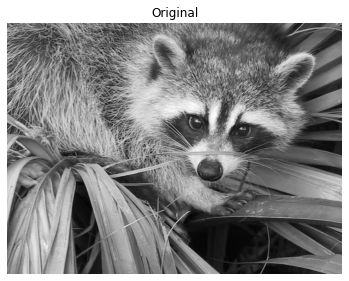

In [51]:
# 이미지 확보

face = misc.face(gray=True)
print(f'face.shape = {face.shape}')

fig, ax_orig = plt.subplots(1,1,figsize=(6,15))
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
fig.show()

In [54]:
v = np.array([[-3-3j, 0-10j, +3-3j],
              [-10+0j, 0+0j, 10+0j],
              [-3+3j, 0+10j, 3+3j]])

conv2d = signal.convolve2d(face, v, boundary='symm', mode='same')  # Conv2D 적용 

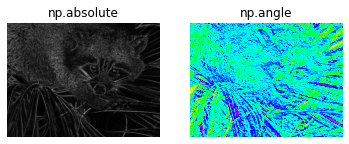

In [58]:
fig, (ax_mag,ax_phase) = plt.subplots(1,2,figsize=(6,15))

ax_mag.imshow(np.absolute(conv2d), cmap='gray')   # 크기
ax_mag.set_title('np.absolute') 
ax_mag.set_axis_off()

ax_phase.imshow(np.angle(conv2d), cmap='hsv')    # 각도
ax_phase.set_title('np.angle')
ax_phase.set_axis_off()

fig.show()

##  이미지에 필터링 적용 

In [61]:
B = [[3,4,5,2,3],
     [3,5,1,2,7],
     [2,2,5,6,7]
    ]
B = np.array(B)

In [62]:
maximum_filter(B, size=(2,2))

array([[3, 4, 5, 5, 3],
       [3, 5, 5, 5, 7],
       [3, 5, 5, 6, 7]])

In [67]:
minimum_filter(B, size=(2,2))

array([[3, 3, 4, 2, 2],
       [3, 3, 1, 1, 2],
       [2, 2, 1, 1, 2]])

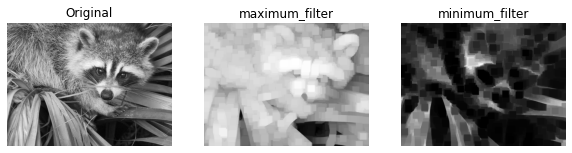

In [77]:
# 이미지에 적용하기 

maxed = maximum_filter(face, footprint=np.ones((40,40)))  
mined = minimum_filter(face, footprint=np.ones((40,40)))  

fig, (ax_orig, ax_max,ax_min) = plt.subplots(1,3,figsize=(10,20))

ax_orig.imshow(face, cmap='gray')   
ax_orig.set_title('Original') 
ax_orig.set_axis_off()

ax_max.imshow(maxed, cmap='gray')   
ax_max.set_title('maximum_filter') 
ax_max.set_axis_off()

ax_min.imshow(mined, cmap='gray')    
ax_min.set_title('minimum_filter')
ax_min.set_axis_off()

fig.show()

## 폴링 처리하기 

In [82]:
B = [[3,4,5,2,3],
     [3,5,1,2,7],
     [2,2,5,6,7]
    ]
B = np.array(B)

In [83]:
skimage.measure.block_reduce(B, (2,2), np.max)

array([[5, 5, 7],
       [2, 6, 7]])

In [84]:
skimage.measure.block_reduce(B, (2,2), np.min)

array([[3, 1, 0],
       [0, 0, 0]])

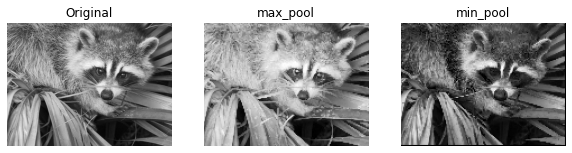

In [89]:
# 이미지에 적용하기 

pool_size = 7
maxed = skimage.measure.block_reduce(face, (pool_size,pool_size), np.max)
mined = skimage.measure.block_reduce(face, (pool_size,pool_size), np.min)

fig, (ax_orig, ax_max,ax_min) = plt.subplots(1,3,figsize=(10,20))

ax_orig.imshow(face, cmap='gray')   
ax_orig.set_title('Original') 
ax_orig.set_axis_off()

ax_max.imshow(maxed, cmap='gray')   
ax_max.set_title('max_pool') 
ax_max.set_axis_off()

ax_min.imshow(mined, cmap='gray')    
ax_min.set_title('min_pool')
ax_min.set_axis_off()

fig.show()